In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
matches.shape

(1095, 20)

# Data Cleaning and Feature Engineering

## handling matches data set

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

# 1.Handling Missing Values and Duplicated Values

In [7]:
# 1. city(Since each venue is in a specific city, we can infer the missing cities based on the venue column.)

In [8]:
missing_cities = matches[matches['city'].isnull()]['venue'].unique()
print(missing_cities)

['Sharjah Cricket Stadium' 'Dubai International Cricket Stadium']


In [9]:
 matches[matches['venue']=='Sharjah Cricket Stadium']['city'].unique()

array([nan, 'Sharjah'], dtype=object)

In [10]:
 matches[matches['venue']=='Dubai International Cricket Stadium']['city'].unique()

array([nan, 'Dubai'], dtype=object)

In [11]:
venue_city_map = {
    "Dubai International Cricket Stadium": "Dubai",
    "Sharjah Cricket Stadium": "Sharjah",
}
matches['city'].fillna(matches['venue'].map(venue_city_map), inplace=True)

C:\Users\AFZAL\AppData\Local\Temp\ipykernel_8112\3598441693.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['city'].fillna(matches['venue'].map(venue_city_map), inplace=True)


In [12]:
print(matches['city'].isnull().sum()) 

0


In [13]:
#2  handling 'player_of_match', 'winner'

In [14]:
matches = matches.dropna(subset=['player_of_match', 'winner'])
matches.reset_index(drop=True, inplace=True)
print(matches.isnull().sum())

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin        14
target_runs           0
target_overs          0
super_over            0
method             1069
umpire1               0
umpire2               0
dtype: int64


In [15]:
# result_margin and method 

In [16]:
matches['result_margin']

0       140.0
1        33.0
2         9.0
3         5.0
4         5.0
        ...  
1085      4.0
1086      8.0
1087      4.0
1088     36.0
1089      8.0
Name: result_margin, Length: 1090, dtype: float64

In [17]:
matches.drop(columns=['method'], inplace=True)

In [18]:
matches['result'].unique()

array(['runs', 'wickets', 'tie'], dtype=object)

In [19]:
print(matches[matches['result_margin'].isna()][['winner', 'result']])

                          winner result
66              Rajasthan Royals    tie
130              Kings XI Punjab    tie
327          Sunrisers Hyderabad    tie
341  Royal Challengers Bangalore    tie
415             Rajasthan Royals    tie
474              Kings XI Punjab    tie
607               Mumbai Indians    tie
702               Delhi Capitals    tie
742               Mumbai Indians    tie
753               Delhi Capitals    tie
761  Royal Challengers Bangalore    tie
786        Kolkata Knight Riders    tie
787              Kings XI Punjab    tie
831               Delhi Capitals    tie


In [20]:
matches['result_margin'].fillna(0, inplace=True)

C:\Users\AFZAL\AppData\Local\Temp\ipykernel_8112\1944951510.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['result_margin'].fillna(0, inplace=True)


In [21]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

In [22]:
matches.duplicated().sum()

np.int64(0)

 # 2. Standardize Team Names

In [23]:
matches.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen


In [24]:
matches['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [25]:
handle_team_name= {
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad'
}
matches.replace(handle_team_name, inplace=True)

In [26]:
matches['toss_winner'].unique()

array(['Royal Challengers Bengaluru', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Punjab Kings', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

# 3.Convert Date to Datetime Format

In [27]:
matches['date'] = pd.to_datetime(matches['date'])

In [28]:
matches.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen


# 4. Remove Super Over Matches

In [29]:
matches = matches[matches['result'] != 'tie']

# 5.Remove Unnecessary Columns

In [30]:
matches.drop(columns=['umpire1', 'umpire2'], inplace=True)

In [31]:
matches['super_over'].unique()

array(['N'], dtype=object)

In [32]:
matches['target_overs'].value_counts()

target_overs
20.0    1047
6.0        4
16.0       3
8.0        3
10.0       3
12.0       3
18.0       2
13.0       2
17.0       2
11.0       2
9.2        1
5.0        1
9.0        1
14.0       1
15.0       1
Name: count, dtype: int64

In [33]:
matches.drop(columns=['super_over','target_overs'], inplace=True)

In [34]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1076 entries, 0 to 1089
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1076 non-null   int64         
 1   season           1076 non-null   object        
 2   city             1076 non-null   object        
 3   date             1076 non-null   datetime64[ns]
 4   match_type       1076 non-null   object        
 5   player_of_match  1076 non-null   object        
 6   venue            1076 non-null   object        
 7   team1            1076 non-null   object        
 8   team2            1076 non-null   object        
 9   toss_winner      1076 non-null   object        
 10  toss_decision    1076 non-null   object        
 11  winner           1076 non-null   object        
 12  result           1076 non-null   object        
 13  result_margin    1076 non-null   float64       
 14  target_runs      1076 non-null   float64     

In [35]:
matches.shape

(1076, 15)

##  handling deliveries dataset

In [36]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [37]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

## handling missing and duplicated data

In [38]:
deliveries[['extras_type','player_dismissed','dismissal_kind','fielder']].isnull().sum()

extras_type         246795
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [39]:
deliveries.drop(columns=['extras_type', 'player_dismissed', 'dismissal_kind', 'fielder'], inplace=True)

In [40]:
print(deliveries.isnull().sum())

match_id        0
inning          0
batting_team    0
bowling_team    0
over            0
ball            0
batter          0
bowler          0
non_striker     0
batsman_runs    0
extra_runs      0
total_runs      0
is_wicket       0
dtype: int64


In [41]:
print(deliveries.duplicated().sum())


0


In [42]:
print(deliveries.dtypes)

match_id         int64
inning           int64
batting_team    object
bowling_team    object
over             int64
ball             int64
batter          object
bowler          object
non_striker     object
batsman_runs     int64
extra_runs       int64
total_runs       int64
is_wicket        int64
dtype: object


In [43]:
(deliveries["total_runs"] != deliveries["batsman_runs"] + deliveries["extra_runs"]).sum()

np.int64(0)

 # 2. Standardize Team Names

In [44]:
deliveries['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [45]:
deliveries.replace(handle_team_name, inplace=True)

In [46]:
handle_team_name

{'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
 'Kings XI Punjab': 'Punjab Kings',
 'Rising Pune Supergiants': 'Rising Pune Supergiant',
 'Delhi Daredevils': 'Delhi Capitals',
 'Deccan Chargers': 'Sunrisers Hyderabad'}

In [47]:
deliveries['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bengaluru',
       'Chennai Super Kings', 'Punjab Kings', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Lucknow Super Giants', 'Gujarat Titans'],
      dtype=object)

In [48]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,0


## EDA

# 1.Team Performance Anaysis

In [49]:
matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0


## 1.Matches Played and Win Percentage

In [50]:
team_performance_df = pd.DataFrame()

In [51]:
team_performance_df['Matches Played']=pd.concat([matches['team1'],matches['team2']]).value_counts()
team_performance_df['Wins']=matches['winner'].value_counts()
team_performance_df['Win Percentage']=(team_performance_df['Wins']/team_performance_df['Matches Played'])*100

team_performance_df

,Matches Played,Wins,Win Percentage
Mumbai Indians,257,142,55.252918
Sunrisers Hyderabad,253,116,45.849802
Royal Challengers Bengaluru,249,121,48.594378
Kolkata Knight Riders,247,130,52.631579
Delhi Capitals,246,112,45.528455
Punjab Kings,242,109,45.041322
Chennai Super Kings,236,138,58.474576
Rajasthan Royals,216,110,50.925926
Pune Warriors,45,12,26.666667
Gujarat Titans,45,28,62.222222


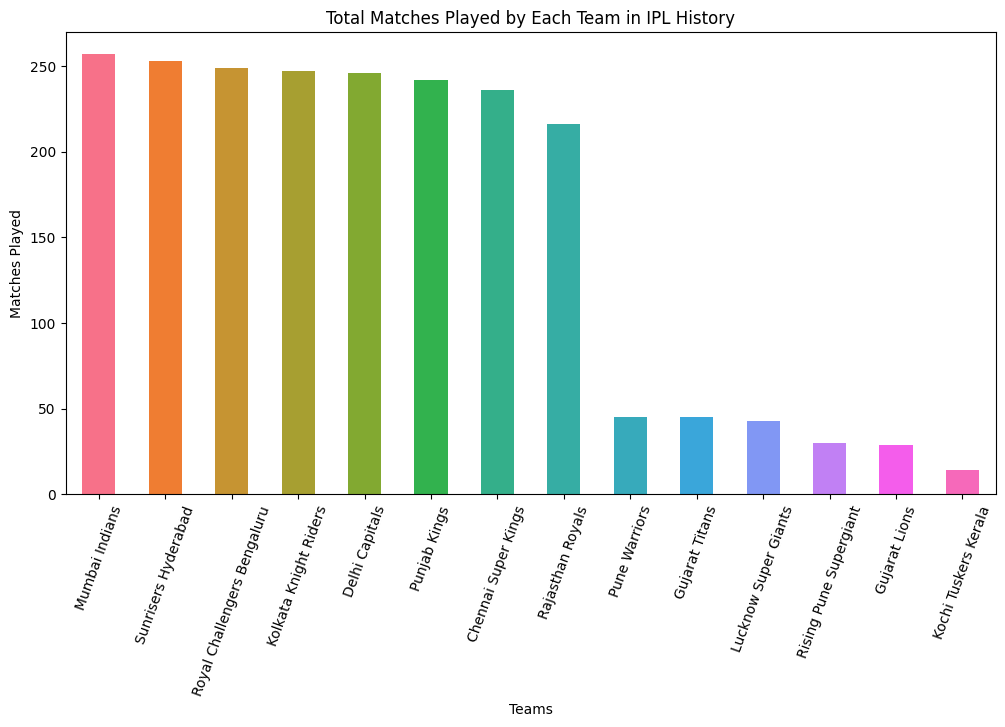

In [52]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(team_performance_df))
team_performance_df['Matches Played'].sort_values(ascending=False).plot(kind='bar',color=colors)
plt.xlabel("Teams")
plt.ylabel("Matches Played")
plt.title("Total Matches Played by Each Team in IPL History")
plt.xticks(rotation=70)
plt.show()

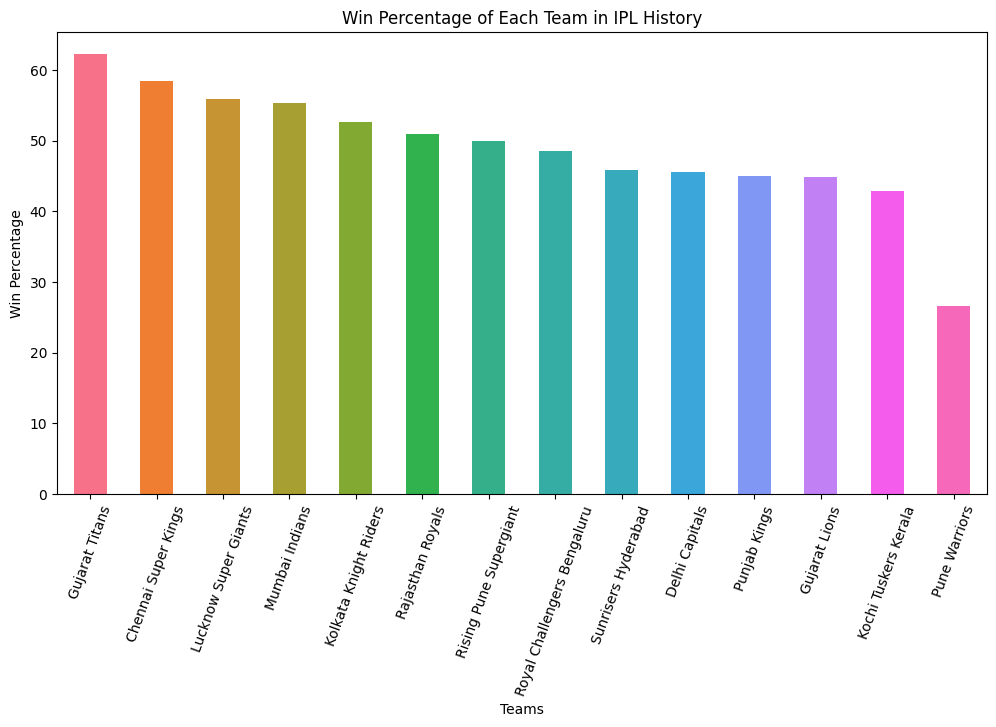

In [53]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(team_performance_df))
team_performance_df['Win Percentage'].sort_values(ascending=False).plot(kind='bar',color=colors)
plt.xlabel("Teams")
plt.ylabel("Win Percentage")
plt.title("Win Percentage of Each Team in IPL History")
plt.xticks(rotation=70)
plt.show()

## 2. Run Rate and Economy Rate

In [54]:
match_runs_RR = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum()  
match_overs_RR = deliveries.groupby(['match_id', 'batting_team'])['over'].nunique()  

match_run_rate_RR = match_runs_RR / match_overs_RR
team_performance_df['Run Rate (RR)'] = match_run_rate_RR.groupby('batting_team').mean()


team_performance_df

,Matches Played,Wins,Win Percentage,Run Rate (RR)
Mumbai Indians,257,142,55.252918,8.336671
Sunrisers Hyderabad,253,116,45.849802,8.145930
Royal Challengers Bengaluru,249,121,48.594378,8.375099
Kolkata Knight Riders,247,130,52.631579,8.276094
Delhi Capitals,246,112,45.528455,8.143312
Punjab Kings,242,109,45.041322,8.340879
Chennai Super Kings,236,138,58.474576,8.342615
Rajasthan Royals,216,110,50.925926,8.168716
Pune Warriors,45,12,26.666667,7.192257
Gujarat Titans,45,28,62.222222,8.733678


In [55]:
match_runs_ER = deliveries.groupby(['match_id', 'bowling_team'])['total_runs'].sum()
match_overs_ER = deliveries.groupby(['match_id', 'bowling_team'])['over'].nunique()
match_economy_rate_ER = match_runs_ER / match_overs_ER
team_performance_df['Economy Rate (ER)'] = match_economy_rate_ER.groupby('bowling_team').mean()

team_performance_df

,Matches Played,Wins,Win Percentage,Run Rate (RR),Economy Rate (ER)
Mumbai Indians,257,142,55.252918,8.336671,8.123890
Sunrisers Hyderabad,253,116,45.849802,8.145930,8.187292
Royal Challengers Bengaluru,249,121,48.594378,8.375099,8.407460
Kolkata Knight Riders,247,130,52.631579,8.276094,8.134927
Delhi Capitals,246,112,45.528455,8.143312,8.272923
Punjab Kings,242,109,45.041322,8.340879,8.494394
Chennai Super Kings,236,138,58.474576,8.342615,8.063092
Rajasthan Royals,216,110,50.925926,8.168716,8.283809
Pune Warriors,45,12,26.666667,7.192257,7.669450
Gujarat Titans,45,28,62.222222,8.733678,8.737265


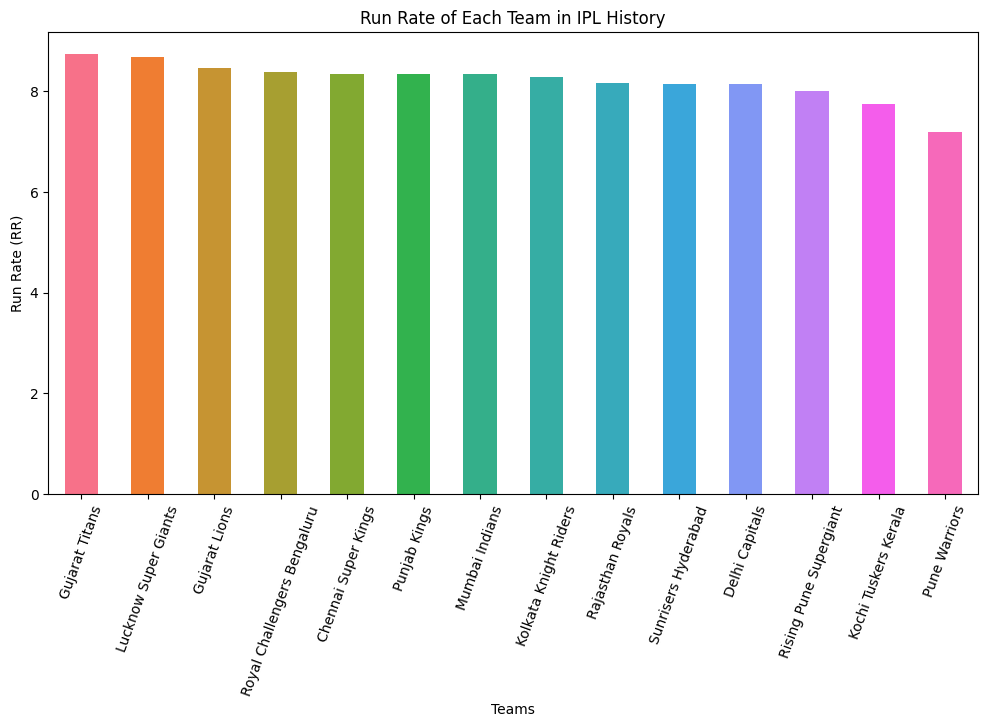

In [56]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(team_performance_df))
team_performance_df['Run Rate (RR)'].sort_values(ascending=False).plot(kind='bar',color=colors)
plt.xlabel("Teams")
plt.ylabel("Run Rate (RR)")
plt.title("Run Rate of Each Team in IPL History")
plt.xticks(rotation=70)
plt.show()

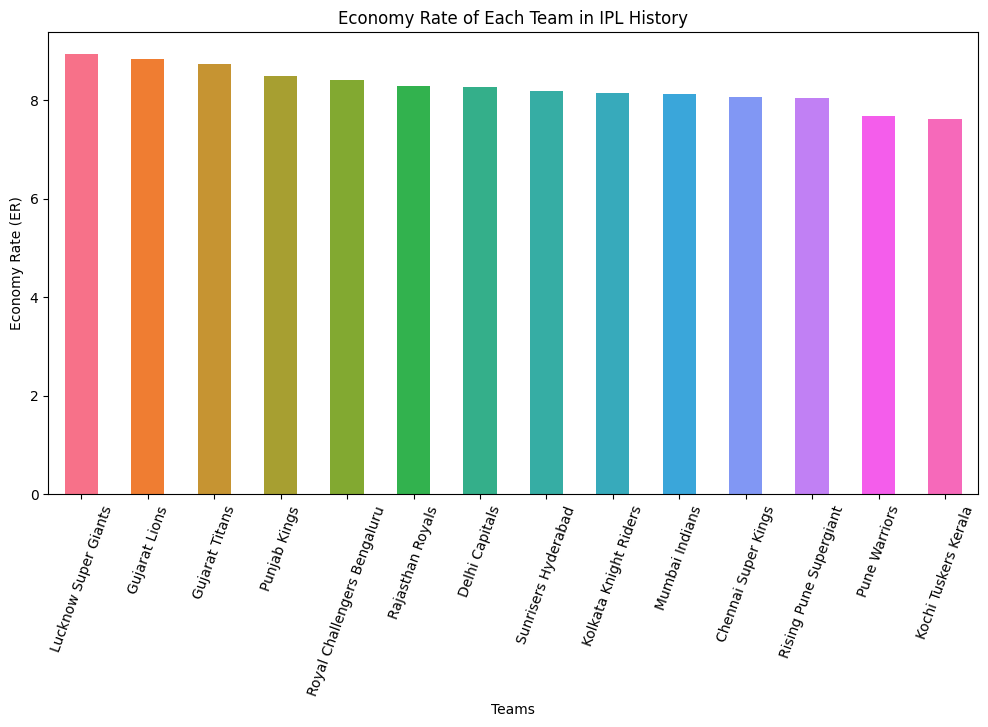

In [57]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(team_performance_df))
team_performance_df['Economy Rate (ER)'].sort_values(ascending=False).plot(kind='bar',color=colors)
plt.xlabel("Teams")
plt.ylabel("Economy Rate (ER)")
plt.title("Economy Rate of Each Team in IPL History")
plt.xticks(rotation=70)
plt.show()

## 3.highest and lowest scores

In [58]:
team_scores = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
highest_scores = team_scores.groupby('batting_team')['total_runs'].max()
lowest_scores = team_scores.groupby('batting_team')['total_runs'].min()
team_performance_df['Highest Score'] = highest_scores
team_performance_df['Lowest Score'] = lowest_scores

team_performance_df

,Matches Played,Wins,Win Percentage,Run Rate (RR),Economy Rate (ER),Highest Score,Lowest Score
Mumbai Indians,257,142,55.252918,8.336671,8.123890,247,68
Sunrisers Hyderabad,253,116,45.849802,8.145930,8.187292,287,44
Royal Challengers Bengaluru,249,121,48.594378,8.375099,8.407460,263,2
Kolkata Knight Riders,247,130,52.631579,8.276094,8.134927,272,48
Delhi Capitals,246,112,45.528455,8.143312,8.272923,257,56
Punjab Kings,242,109,45.041322,8.340879,8.494394,262,68
Chennai Super Kings,236,138,58.474576,8.342615,8.063092,246,55
Rajasthan Royals,216,110,50.925926,8.168716,8.283809,226,41
Pune Warriors,45,12,26.666667,7.192257,7.669450,192,99
Gujarat Titans,45,28,62.222222,8.733678,8.737265,233,89


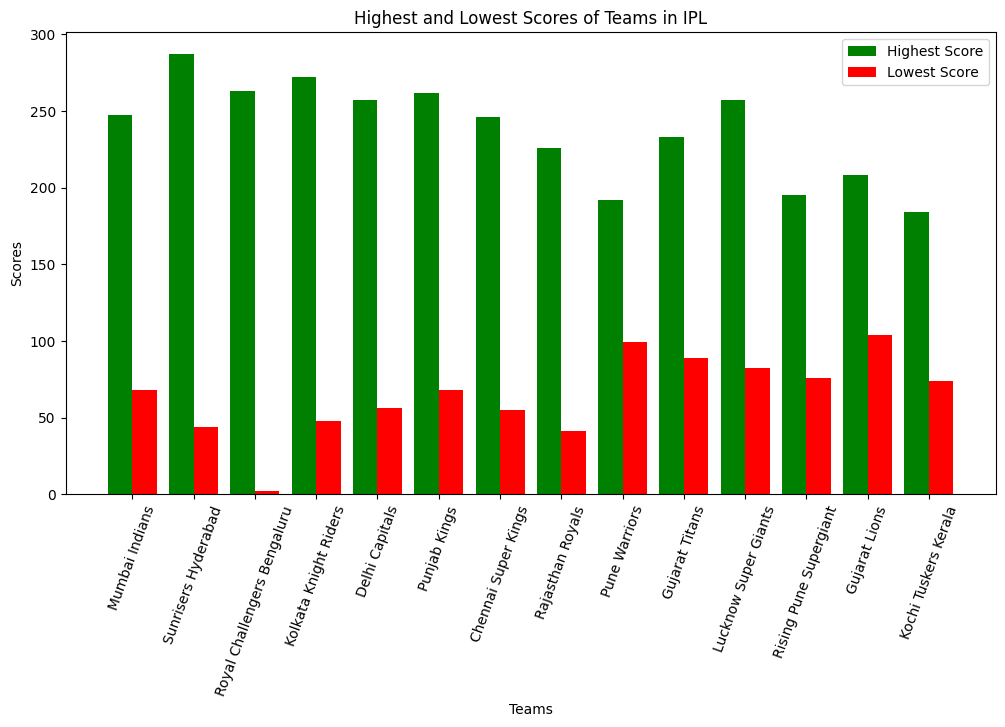

In [59]:
teams = team_performance_df.index
highest_scores = team_performance_df['Highest Score']
lowest_scores = team_performance_df['Lowest Score']

x = np.arange(len(teams))
plt.figure(figsize=(12, 6))
plt.bar(x-0.2, highest_scores, width=0.4, label='Highest Score', color='green')
plt.bar(x+0.2, lowest_scores, width=0.4, label='Lowest Score', color='red')

plt.xlabel('Teams')
plt.ylabel('Scores')
plt.title('Highest and Lowest Scores of Teams in IPL')
plt.xticks(ticks=x, labels=teams, rotation=70,)
plt.legend()

plt.show()


## 4.Total 4's and 6's

In [60]:
fours = deliveries[deliveries['batsman_runs'] == 4]
fours_count = fours.groupby('batting_team')['batsman_runs'].count()
team_performance_df['Total 4s'] = fours_count

sixes= deliveries[deliveries['batsman_runs'] == 6]
sixes_count = sixes.groupby('batting_team')['batsman_runs'].count()
team_performance_df['Total 6s'] = sixes_count

team_performance_df

,Matches Played,Wins,Win Percentage,Run Rate (RR),Economy Rate (ER),Highest Score,Lowest Score,Total 4s,Total 6s
Mumbai Indians,257,142,55.252918,8.336671,8.123890,247,68,3637,1685
Sunrisers Hyderabad,253,116,45.849802,8.145930,8.187292,287,44,3362,1442
Royal Challengers Bengaluru,249,121,48.594378,8.375099,8.407460,263,2,3378,1653
Kolkata Knight Riders,247,130,52.631579,8.276094,8.134927,272,48,3461,1495
Delhi Capitals,246,112,45.528455,8.143312,8.272923,257,56,3508,1351
Punjab Kings,242,109,45.041322,8.340879,8.494394,262,68,3426,1515
Chennai Super Kings,236,138,58.474576,8.342615,8.063092,246,55,3196,1509
Rajasthan Royals,216,110,50.925926,8.168716,8.283809,226,41,3091,1237
Pune Warriors,45,12,26.666667,7.192257,7.669450,192,99,525,196
Gujarat Titans,45,28,62.222222,8.733678,8.737265,233,89,691,271


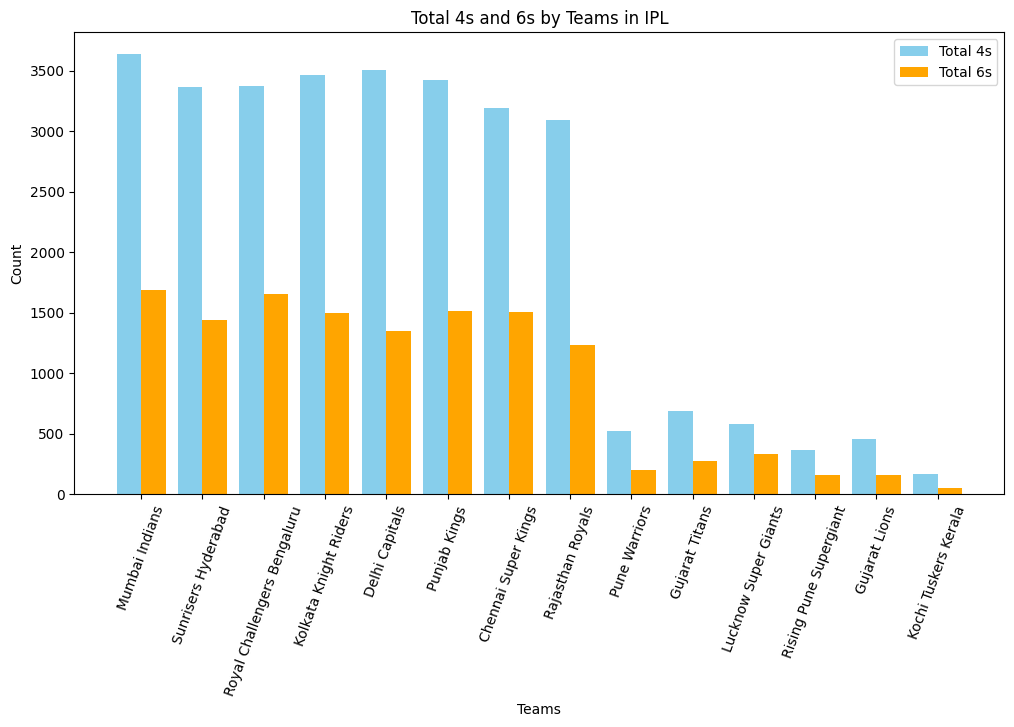

In [61]:
teams = team_performance_df.index
total_4s = team_performance_df['Total 4s']
total_6s = team_performance_df['Total 6s']

x = np.arange(len(teams))
plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, total_4s, width=0.4, label='Total 4s', color='skyblue')
plt.bar(x +0.2, total_6s, width=0.4, label='Total 6s', color='orange')

plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('Total 4s and 6s by Teams in IPL')
plt.xticks(ticks=x, labels=teams, rotation=70,)
plt.legend()
plt.show()

## 5.PowerPlay and Death Over Runs

In [62]:
powerplay= deliveries[deliveries['over'].between(1, 6)]
death_overs= deliveries[deliveries['over'].between(16, 20)]

powerplay_scores = powerplay.groupby('batting_team')['total_runs'].sum()
death_overs_scores = death_overs.groupby('batting_team')['total_runs'].sum()

powerplay_innings = powerplay.groupby('batting_team')['match_id'].nunique()
death_overs_innings = death_overs.groupby('batting_team')['match_id'].nunique()

team_performance_df['Avg Powerplay Score'] = powerplay_scores / powerplay_innings
team_performance_df['Avg Death Overs Score'] = death_overs_scores / death_overs_innings

team_performance_df

,Matches Played,Wins,Win Percentage,Run Rate (RR),Economy Rate (ER),Highest Score,Lowest Score,Total 4s,Total 6s,Avg Powerplay Score,Avg Death Overs Score
Mumbai Indians,257,142,55.252918,8.336671,8.123890,247,68,3637,1685,47.398467,39.016260
Sunrisers Hyderabad,253,116,45.849802,8.145930,8.187292,287,44,3362,1442,48.459144,35.967213
Royal Challengers Bengaluru,249,121,48.594378,8.375099,8.407460,263,2,3378,1653,46.266667,38.746781
Kolkata Knight Riders,247,130,52.631579,8.276094,8.134927,272,48,3461,1495,47.458167,35.950893
Delhi Capitals,246,112,45.528455,8.143312,8.272923,257,56,3508,1351,48.460317,34.974359
Punjab Kings,242,109,45.041322,8.340879,8.494394,262,68,3426,1515,48.699187,35.973913
Chennai Super Kings,236,138,58.474576,8.342615,8.063092,246,55,3196,1509,48.012658,39.741228
Rajasthan Royals,216,110,50.925926,8.168716,8.283809,226,41,3091,1237,46.968182,35.517073
Pune Warriors,45,12,26.666667,7.192257,7.669450,192,99,525,196,41.711111,30.909091
Gujarat Titans,45,28,62.222222,8.733678,8.737265,233,89,691,271,49.244444,41.431818


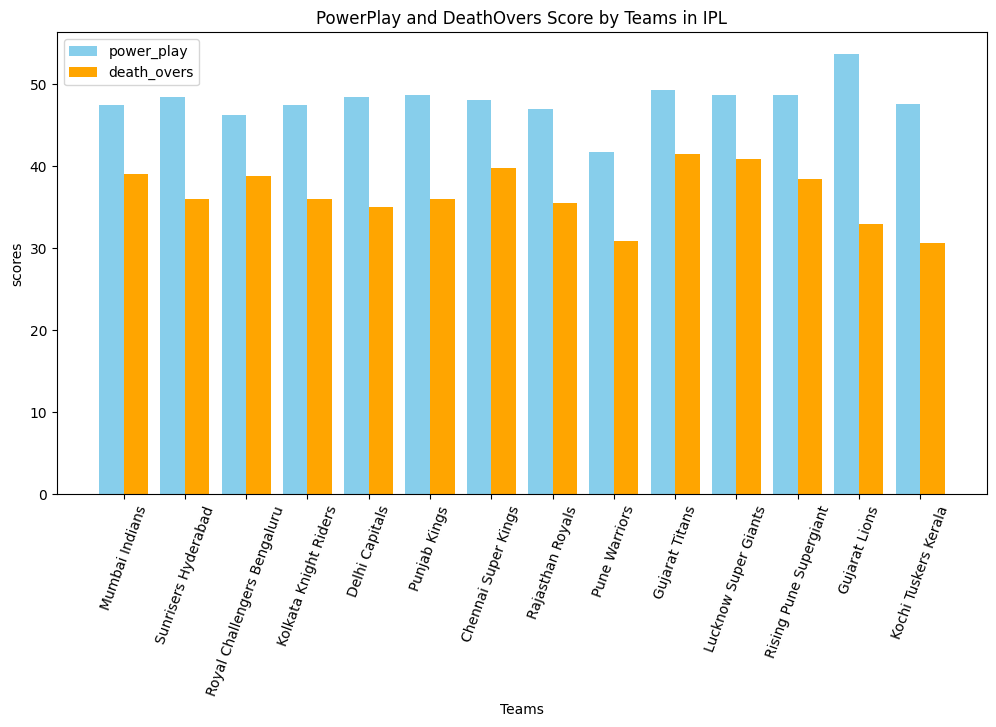

In [63]:
teams = team_performance_df.index
power_play = team_performance_df['Avg Powerplay Score']
death_overs = team_performance_df['Avg Death Overs Score']

x = np.arange(len(teams))
plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, power_play, width=0.4, label='power_play', color='skyblue')
plt.bar(x + 0.2, death_overs, width=0.4, label='death_overs', color='orange')

plt.xlabel('Teams')
plt.ylabel('scores')
plt.title('PowerPlay and DeathOvers Score by Teams in IPL')
plt.xticks(ticks=x, labels=teams, rotation=70,)
plt.legend()
plt.show()

## 6. Avg Run per over of each team

In [64]:
total_runs_RR = deliveries.groupby('batting_team')['total_runs'].sum() 
total_overs_per_match_RR = deliveries.groupby(['match_id', 'batting_team'])['over'].nunique()
total_overs_per_team_RR = total_overs_per_match_RR.groupby('batting_team').sum()

team_performance_df['Avg Runs Per Over'] = total_runs_RR / total_overs_per_team_RR
team_performance_df

,Matches Played,Wins,Win Percentage,Run Rate (RR),Economy Rate (ER),Highest Score,Lowest Score,Total 4s,Total 6s,Avg Powerplay Score,Avg Death Overs Score,Avg Runs Per Over
Mumbai Indians,257,142,55.252918,8.336671,8.123890,247,68,3637,1685,47.398467,39.016260,8.318738
Sunrisers Hyderabad,253,116,45.849802,8.145930,8.187292,287,44,3362,1442,48.459144,35.967213,8.116540
Royal Challengers Bengaluru,249,121,48.594378,8.375099,8.407460,263,2,3378,1653,46.266667,38.746781,8.365321
Kolkata Knight Riders,247,130,52.631579,8.276094,8.134927,272,48,3461,1495,47.458167,35.950893,8.248951
Delhi Capitals,246,112,45.528455,8.143312,8.272923,257,56,3508,1351,48.460317,34.974359,8.126892
Punjab Kings,242,109,45.041322,8.340879,8.494394,262,68,3426,1515,48.699187,35.973913,8.321076
Chennai Super Kings,236,138,58.474576,8.342615,8.063092,246,55,3196,1509,48.012658,39.741228,8.346802
Rajasthan Royals,216,110,50.925926,8.168716,8.283809,226,41,3091,1237,46.968182,35.517073,8.168077
Pune Warriors,45,12,26.666667,7.192257,7.669450,192,99,525,196,41.711111,30.909091,7.192308
Gujarat Titans,45,28,62.222222,8.733678,8.737265,233,89,691,271,49.244444,41.431818,8.745209


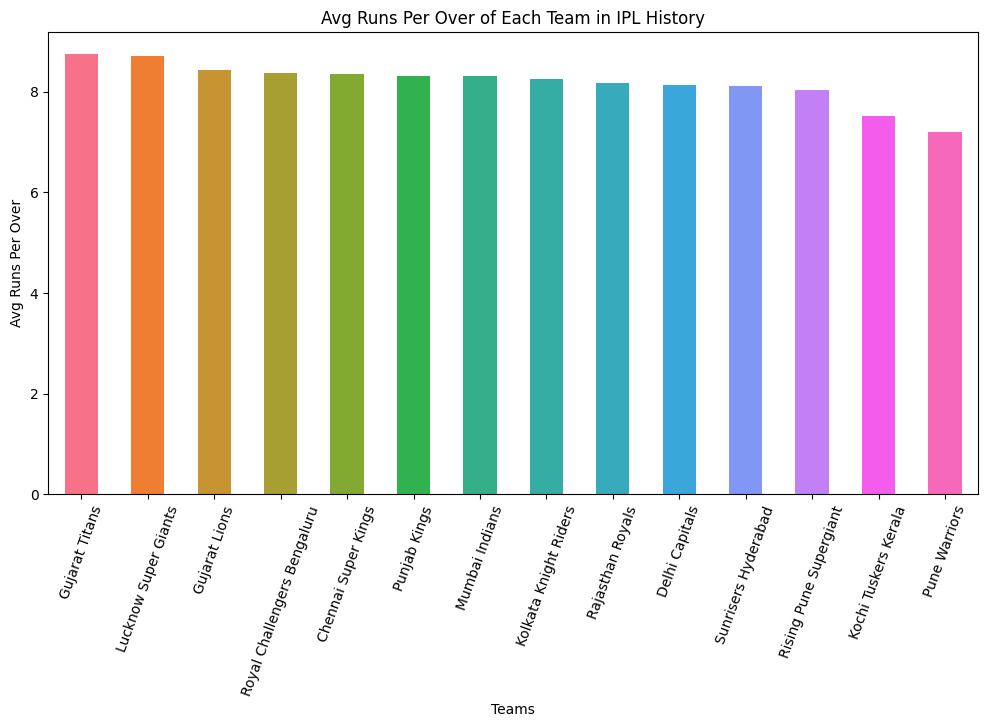

In [121]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(team_performance_df))
team_performance_df['Avg Runs Per Over'].sort_values(ascending=False).plot(kind='bar',color=colors)
plt.xlabel("Teams")
plt.ylabel("Avg Runs Per Over")
plt.title("Avg Runs Per Over of Each Team in IPL History")
plt.xticks(rotation=70)
plt.show()

# 7. Power Play Analysis

In [66]:
powerplay_deliveries = deliveries[deliveries['over'] <= 5] #as the overs start from zero

### A.Power Play Run Rate

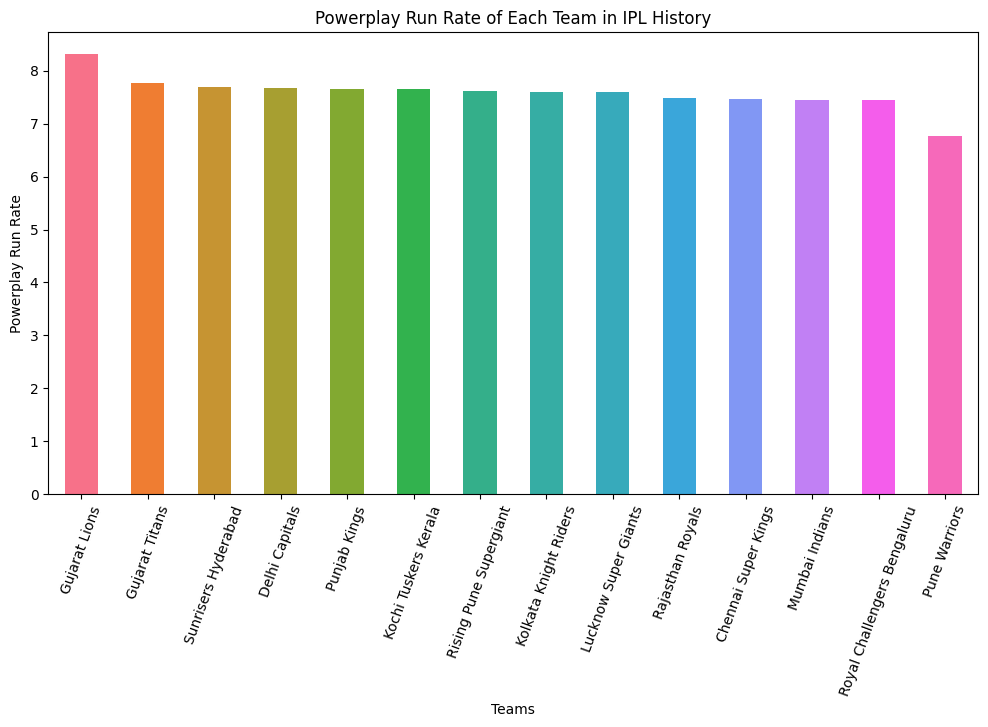

In [67]:
total_balls_powerplay = powerplay_deliveries.groupby('batting_team')['ball'].count()
total_powerplay_runs = powerplay_deliveries.groupby('batting_team')['total_runs'].sum()
total_overs_powerplay = total_balls_powerplay / 6
team_performance_df['Powerplay Run Rate'] = total_powerplay_runs / total_overs_powerplay

plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(team_performance_df))
team_performance_df['Powerplay Run Rate'].sort_values(ascending=False).plot(kind='bar',color=colors)
plt.xlabel("Teams")
plt.ylabel("Powerplay Run Rate")
plt.title("Powerplay Run Rate of Each Team in IPL History")
plt.xticks(rotation=70)
plt.show()

### B. Total 4s and 6s in Power Play

In [68]:
powerplay_fours = powerplay_deliveries[powerplay_deliveries['batsman_runs'] == 4]
powerplay_fours_count = powerplay_fours.groupby('batting_team')['batsman_runs'].count()
team_performance_df['PP Total 4s'] = powerplay_fours_count

poweplay_sixes= powerplay_deliveries[powerplay_deliveries['batsman_runs'] == 6]
poweplay_sixes_count = poweplay_sixes.groupby('batting_team')['batsman_runs'].count()
team_performance_df['PP Total 6s'] = poweplay_sixes_count

team_performance_df[['PP Total 4s','PP Total 6s']]

,PP Total 4s,PP Total 6s
Mumbai Indians,1435,374
Sunrisers Hyderabad,1467,342
Royal Challengers Bengaluru,1409,353
Kolkata Knight Riders,1465,340
Delhi Capitals,1518,332
Punjab Kings,1449,343
Chennai Super Kings,1283,343
Rajasthan Royals,1319,272
Pune Warriors,235,34
Gujarat Titans,281,44


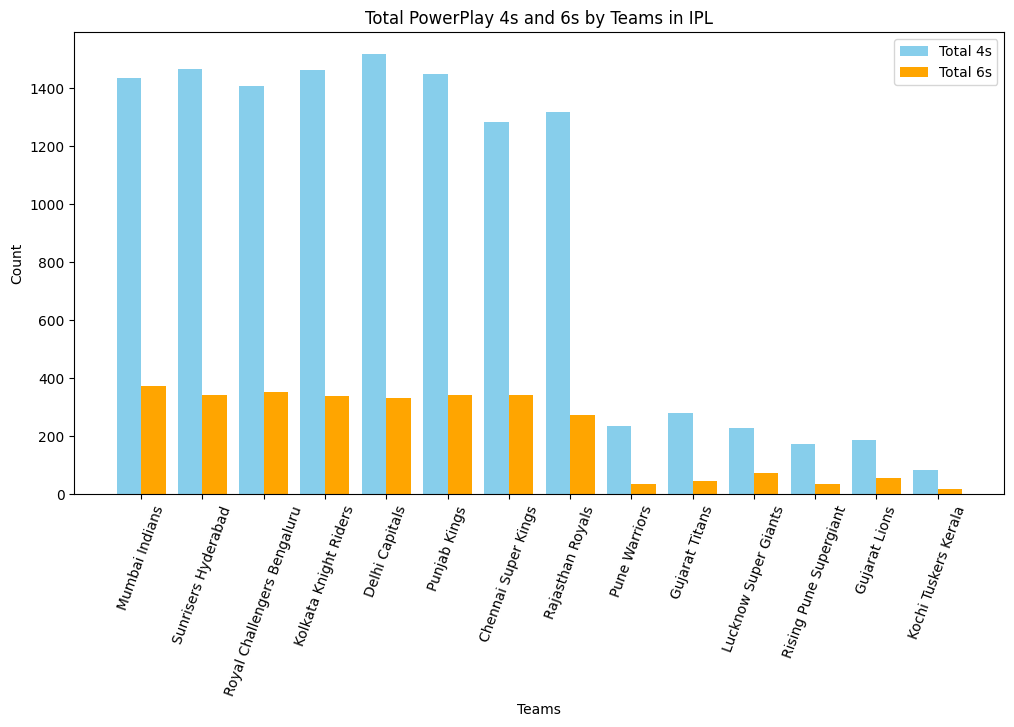

In [69]:
teams = team_performance_df.index
total_pp_4s = team_performance_df['PP Total 4s']
total_pp_6s = team_performance_df['PP Total 6s']

x = np.arange(len(teams))
plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, total_pp_4s, width=0.4, label='Total 4s', color='skyblue')
plt.bar(x +0.2, total_pp_6s, width=0.4, label='Total 6s', color='orange')

plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('Total PowerPlay 4s and 6s by Teams in IPL')
plt.xticks(ticks=x, labels=teams, rotation=70,)
plt.legend()
plt.show()

### c. total wickets taken by teams in PP

In [70]:
powerplay_wickets_data=powerplay_deliveries[powerplay_deliveries['is_wicket'] == 1]
x=powerplay_wickets_data.groupby('bowling_team')['is_wicket'].count()
team_performance_df['Wickets Taken in Powerplay'] = x

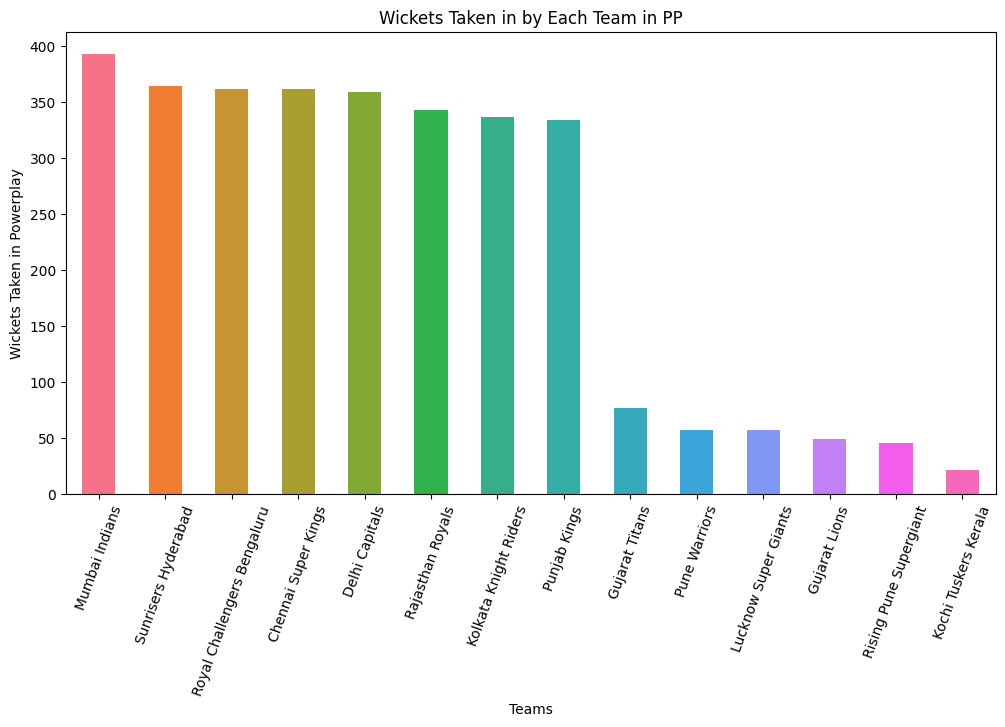

In [71]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(team_performance_df))
team_performance_df['Wickets Taken in Powerplay'].sort_values(ascending=False).plot(kind='bar',color=colors)
plt.xlabel("Teams")
plt.ylabel("Wickets Taken in Powerplay")
plt.title("Wickets Taken in by Each Team in PP")
plt.xticks(rotation=70)
plt.show()

# 2.Player Performance

In [72]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   match_id      260920 non-null  int64 
 1   inning        260920 non-null  int64 
 2   batting_team  260920 non-null  object
 3   bowling_team  260920 non-null  object
 4   over          260920 non-null  int64 
 5   ball          260920 non-null  int64 
 6   batter        260920 non-null  object
 7   bowler        260920 non-null  object
 8   non_striker   260920 non-null  object
 9   batsman_runs  260920 non-null  int64 
 10  extra_runs    260920 non-null  int64 
 11  total_runs    260920 non-null  int64 
 12  is_wicket     260920 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 25.9+ MB


In [73]:
player_performance_df = pd.DataFrame()

player_performance_df['Total Runs'] = deliveries.groupby('batter')['batsman_runs'].sum()
player_performance_df['Balls Faced'] = deliveries.groupby('batter')['ball'].count()
player_performance_df['Matches Played'] = deliveries.groupby('batter')['match_id'].nunique()
player_performance_df['Wickets Taken'] = deliveries[deliveries['is_wicket'] == 1].groupby('bowler').size()
#batting average
player_performance_df['Dismissals'] = deliveries[deliveries['is_wicket'] == 1].groupby('batter')['is_wicket'].count()
player_performance_df['Batting Average'] = player_performance_df['Total Runs'] / player_performance_df['Dismissals']

#batting strike rate
player_performance_df['Strike Rate'] = (player_performance_df['Total Runs'] / player_performance_df['Balls Faced']) * 100

player_performance_df.head()


,Total Runs,Balls Faced,Matches Played,Wickets Taken,Dismissals,Batting Average,Strike Rate
batter,,,,,,,
A Ashish Reddy,280,196,23,19.0,15.0,18.666667,142.857143
A Badoni,634,505,35,2.0,26.0,24.384615,125.544554
A Chandila,4,7,2,11.0,1.0,4.000000,57.142857
A Chopra,53,75,6,NaN,5.0,10.600000,70.666667
A Choudhary,25,20,3,5.0,2.0,12.500000,125.000000


In [74]:
player_performance_df = player_performance_df.reset_index().rename(columns={'batter': 'Player'})
player_performance_df.fillna({'Wickets Taken': 0}, inplace=True)
player_performance_df.head()

,Player,Total Runs,Balls Faced,Matches Played,Wickets Taken,Dismissals,Batting Average,Strike Rate
0,A Ashish Reddy,280,196,23,19.0,15.0,18.666667,142.857143
1,A Badoni,634,505,35,2.0,26.0,24.384615,125.544554
2,A Chandila,4,7,2,11.0,1.0,4.000000,57.142857
3,A Chopra,53,75,6,0.0,5.0,10.600000,70.666667
4,A Choudhary,25,20,3,5.0,2.0,12.500000,125.000000


## 1.Top 20 Run Scorers

In [75]:
top_20_run_scorers = player_performance_df.sort_values(by='Total Runs', ascending=False).head(20)
top_20_run_scorers


,Player,Total Runs,Balls Faced,Matches Played,Wickets Taken,Dismissals,Batting Average,Strike Rate
631,V Kohli,8014,6236,244,5.0,218.0,36.761468,128.511867
512,S Dhawan,6769,5483,221,4.0,194.0,34.891753,123.454313
477,RG Sharma,6630,5183,251,16.0,232.0,28.577586,127.918194
147,DA Warner,6567,4849,184,0.0,164.0,40.042683,135.429986
546,SK Raina,5536,4177,200,30.0,168.0,32.952381,132.535312
374,MS Dhoni,5243,3947,228,0.0,149.0,35.187919,132.835065
30,AB de Villiers,5181,3487,170,0.0,125.0,41.448000,148.580442
124,CH Gayle,4997,3516,141,19.0,128.0,39.039062,142.121729
501,RV Uthappa,4954,3927,197,0.0,184.0,26.923913,126.152279
282,KD Karthik,4843,3687,233,0.0,189.0,25.624339,131.353404


<Figure size 1200x600 with 0 Axes>

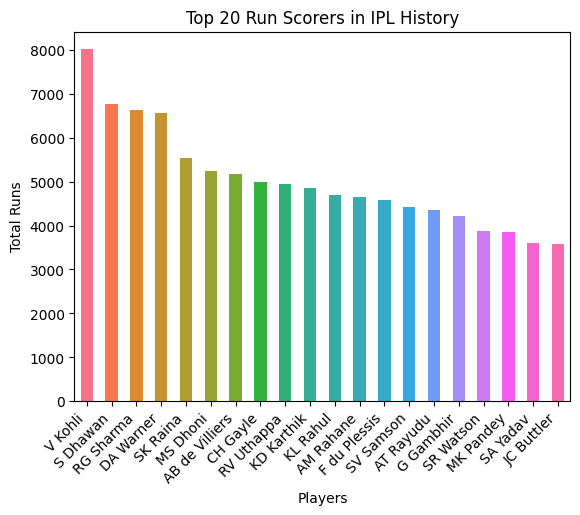

In [76]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(top_20_run_scorers))
top_20_run_scorers.plot(kind='bar', x='Player', y='Total Runs', color=colors, legend=False)
plt.xlabel("Players")
plt.ylabel("Total Runs")
plt.title("Top 20 Run Scorers in IPL History")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## 2.  Batting Average vs Batting Strike Rate for the top 20 run-scorers

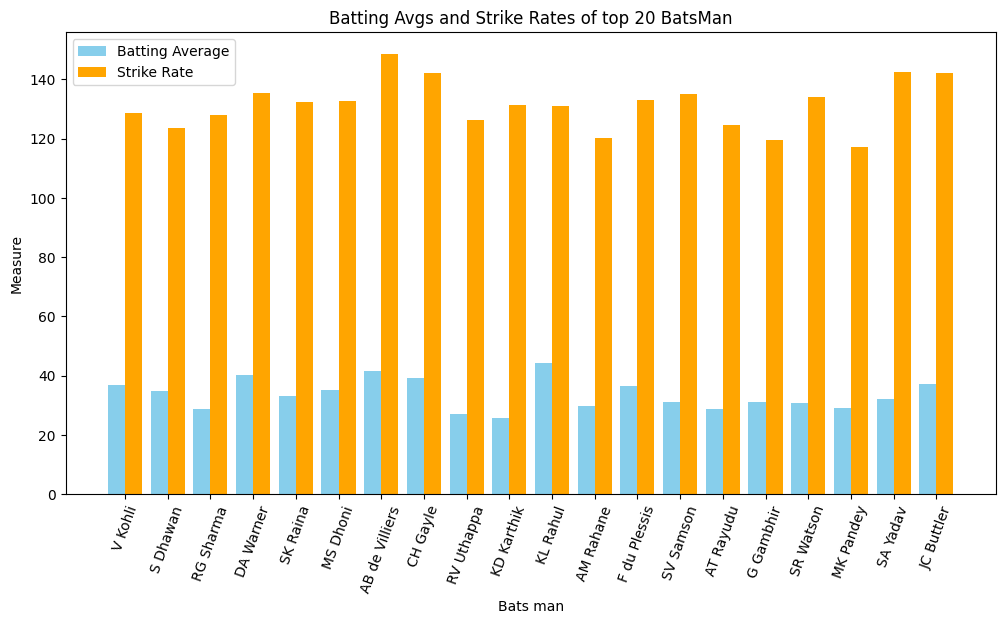

In [120]:
players = top_20_run_scorers['Player']
batting_avgs = top_20_run_scorers['Batting Average']
strike_rates = top_20_run_scorers['Strike Rate']

x = np.arange(len(players))
plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, batting_avgs, width=0.4, label='Batting Average', color='skyblue')
plt.bar(x + 0.2, strike_rates, width=0.4, label='Strike Rate', color='orange')

plt.xlabel('Bats man')
plt.ylabel('Measure')
plt.title('Batting Avgs and Strike Rates of top 20 BatsMan')
plt.xticks(ticks=x, labels=players, rotation=70,)
plt.legend()
plt.show()

## 3.Highest Average and Strike Rate for players with >50 matches

In [78]:
players_50 = player_performance_df[player_performance_df['Matches Played'] > 50]
highest_avg = players_50.sort_values(by='Batting Average', ascending=False).head(1)['Player'].values[0]
highest_sr = players_50.sort_values(by='Strike Rate', ascending=False).head(1)['Player'].values[0]

print("Highest Batting Average Player:", highest_avg)
print("Highest Strike Rate Player", highest_sr)

Highest Batting Average Player: KL Rahul
Highest Strike Rate Player AD Russell


## 4.top wicket-takers

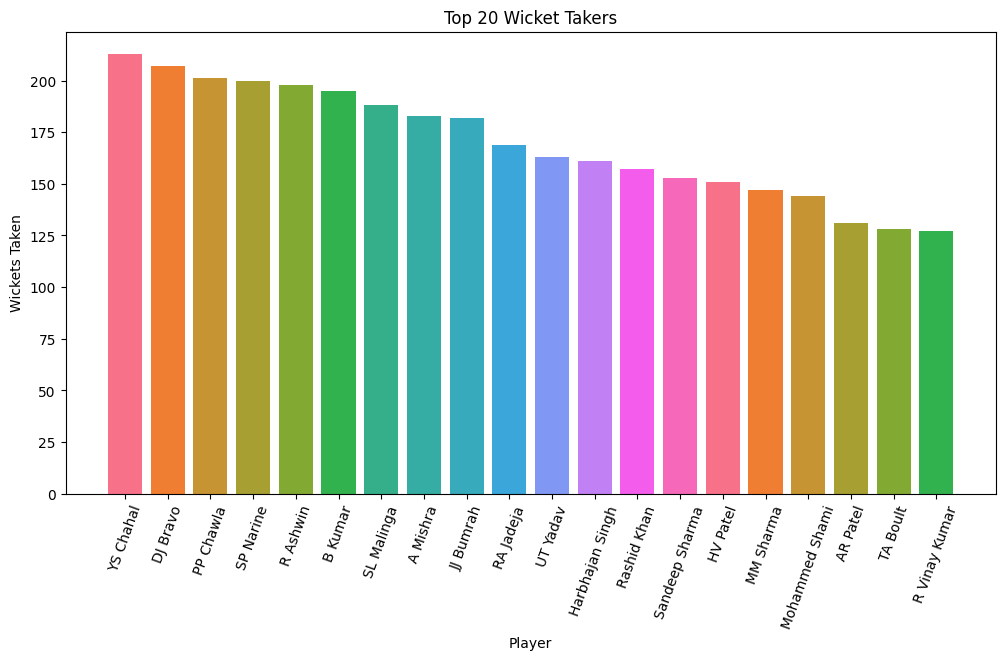

In [114]:
top_20_wicket_takers = player_performance_df.sort_values(by='Wickets Taken', ascending=False).head(20)

plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(team_performance_df))
plt.bar(top_20_wicket_takers['Player'],top_20_wicket_takers['Wickets Taken'], color=colors)

plt.xlabel('Player')
plt.ylabel('Wickets Taken')
plt.title('Top 20 Wicket Takers')
plt.xticks(rotation=70)
plt.show()


## 5.top highest individual scores

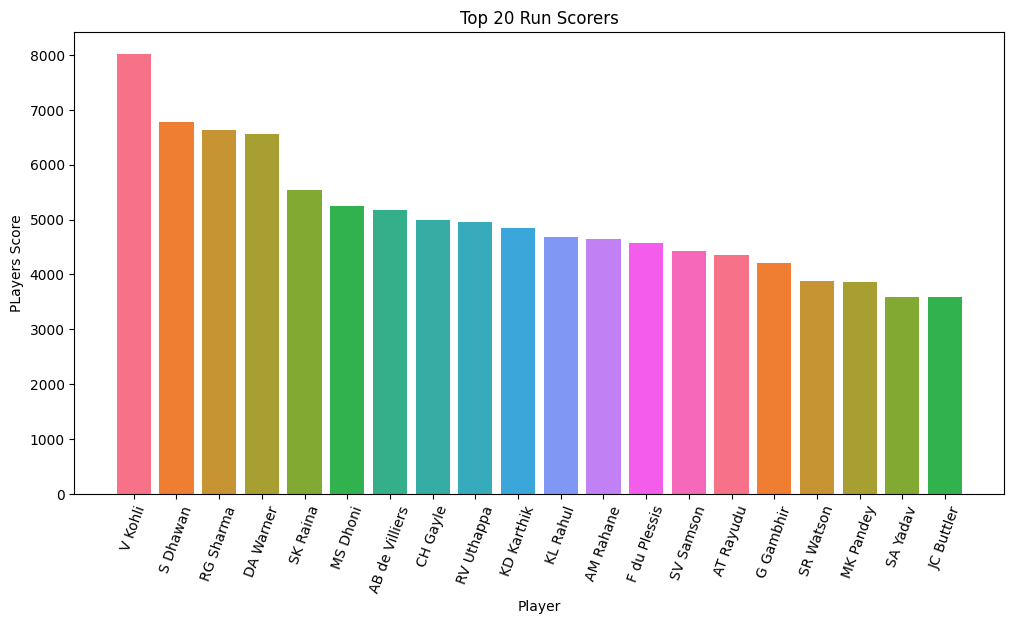

In [119]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(team_performance_df))
plt.bar(top_20_run_scorers['Player'],top_20_run_scorers['Total Runs'], color=colors)

plt.xlabel('Player')
plt.ylabel('PLayers Score')
plt.title('Top 20 Run Scorers')
plt.xticks(rotation=70)
plt.show()

## 6.Man of the Match Count Analysis

In [81]:
mom_counts = matches['player_of_match'].value_counts()
player_performance_df['Man Of Match Count'] = player_performance_df['Player'].map(mom_counts)
player_performance_df['Man Of Match Count'] = player_performance_df['Man Of Match Count'].fillna(0).astype(int)
player_performance_df

,Player,Total Runs,Balls Faced,Matches Played,Wickets Taken,Dismissals,Batting Average,Strike Rate,Man Of Match Count
0,A Ashish Reddy,280,196,23,19.0,15.0,18.666667,142.857143,0
1,A Badoni,634,505,35,2.0,26.0,24.384615,125.544554,0
2,A Chandila,4,7,2,11.0,1.0,4.000000,57.142857,1
3,A Chopra,53,75,6,0.0,5.0,10.600000,70.666667,0
4,A Choudhary,25,20,3,5.0,2.0,12.500000,125.000000,0
...,...,...,...,...,...,...,...,...,...
668,Yashpal Singh,47,67,4,0.0,4.0,11.750000,70.149254,0
669,Younis Khan,3,7,1,0.0,1.0,3.000000,42.857143,0
670,Yudhvir Singh,22,16,4,4.0,4.0,5.500000,137.500000,0
671,Yuvraj Singh,2754,2207,126,39.0,109.0,25.266055,124.784776,5


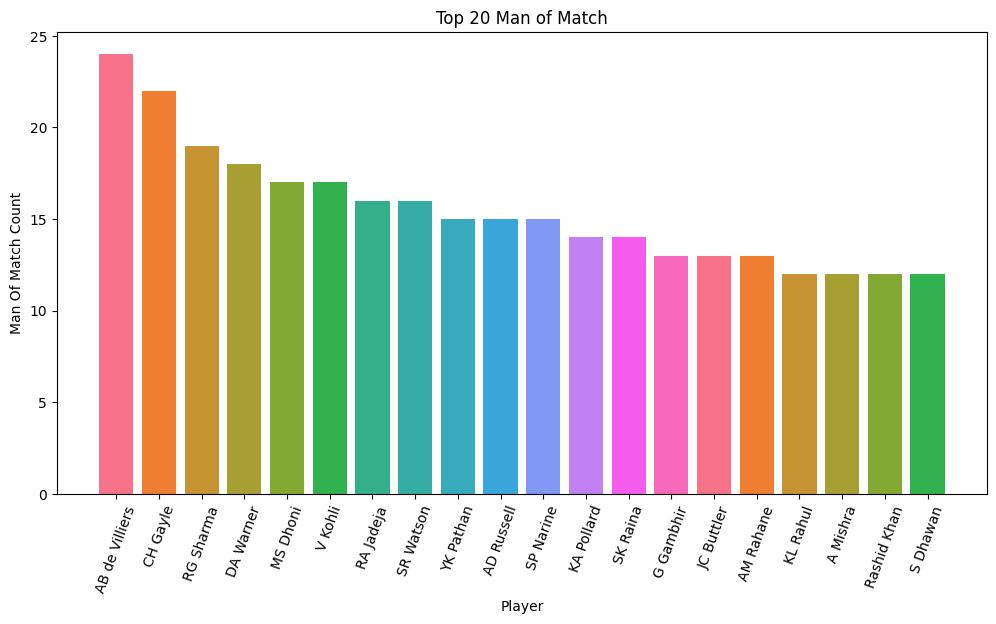

In [118]:
top_20_MoM = player_performance_df.sort_values(by='Man Of Match Count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(team_performance_df))
plt.bar(top_20_MoM['Player'],top_20_MoM['Man Of Match Count'], color=colors)

plt.xlabel('Player')
plt.ylabel('Man Of Match Count')
plt.title('Top 20 Man of Match')
plt.xticks(rotation=70)
plt.show()

## 7.Use K-Means Clustering to plot Batting Average vs Bowling Economy Rate for number of clusters = 3 (Batsman, Bowler, All Rounder)

In [83]:
player_performance_df

,Player,Total Runs,Balls Faced,Matches Played,Wickets Taken,Dismissals,Batting Average,Strike Rate,Man Of Match Count
0,A Ashish Reddy,280,196,23,19.0,15.0,18.666667,142.857143,0
1,A Badoni,634,505,35,2.0,26.0,24.384615,125.544554,0
2,A Chandila,4,7,2,11.0,1.0,4.000000,57.142857,1
3,A Chopra,53,75,6,0.0,5.0,10.600000,70.666667,0
4,A Choudhary,25,20,3,5.0,2.0,12.500000,125.000000,0
...,...,...,...,...,...,...,...,...,...
668,Yashpal Singh,47,67,4,0.0,4.0,11.750000,70.149254,0
669,Younis Khan,3,7,1,0.0,1.0,3.000000,42.857143,0
670,Yudhvir Singh,22,16,4,4.0,4.0,5.500000,137.500000,0
671,Yuvraj Singh,2754,2207,126,39.0,109.0,25.266055,124.784776,5


### preparing the data set with batting avg and strike rate for KNN

In [84]:
player_performance_df.set_index('Player', inplace=True)


In [85]:
player_performance_df['Total Runs Conceded']=deliveries.groupby('bowler')['total_runs'].sum()
player_performance_df['Total Balls Bowled'] = deliveries.groupby('bowler').size()
player_performance_df['Total Overs Bowled'] = player_performance_df['Total Balls Bowled'] // 6 + (player_performance_df['Total Balls Bowled'] % 6) / 10
player_performance_df['Bowling Economy Rate'] = player_performance_df['Total Runs Conceded'] / player_performance_df['Total Overs Bowled']
player_performance_df['Bowling Economy Rate'] = player_performance_df['Bowling Economy Rate'].fillna(0).astype(int)

In [86]:
player_performance_df.reset_index(inplace=True)

In [87]:
player_performance_df.head(3)

,Player,Total Runs,Balls Faced,Matches Played,Wickets Taken,Dismissals,Batting Average,Strike Rate,Man Of Match Count,Total Runs Conceded,Total Balls Bowled,Total Overs Bowled,Bowling Economy Rate
0,A Ashish Reddy,280,196,23,19.0,15.0,18.666667,142.857143,0,400.0,270.0,45.0,8
1,A Badoni,634,505,35,2.0,26.0,24.384615,125.544554,0,37.0,25.0,4.1,9
2,A Chandila,4,7,2,11.0,1.0,4.000000,57.142857,1,245.0,234.0,39.0,6


### selecting feartures for KNN

In [88]:
features_KNN = player_performance_df[['Batting Average', 'Bowling Economy Rate']]
features_KNN = features_KNN.fillna(0)
print(features_KNN.isnull().sum())

Batting Average         0
Bowling Economy Rate    0
dtype: int64


### implementing KNN

In [89]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
player_performance_df['Cluster']= kmeans.fit_predict(features_KNN)
player_performance_df.head()

,Player,Total Runs,Balls Faced,Matches Played,Wickets Taken,Dismissals,Batting Average,Strike Rate,Man Of Match Count,Total Runs Conceded,Total Balls Bowled,Total Overs Bowled,Bowling Economy Rate,Cluster
0,A Ashish Reddy,280,196,23,19.0,15.0,18.666667,142.857143,0,400.0,270.0,45.0,8,2
1,A Badoni,634,505,35,2.0,26.0,24.384615,125.544554,0,37.0,25.0,4.1,9,2
2,A Chandila,4,7,2,11.0,1.0,4.000000,57.142857,1,245.0,234.0,39.0,6,1
3,A Chopra,53,75,6,0.0,5.0,10.600000,70.666667,0,NaN,NaN,NaN,0,1
4,A Choudhary,25,20,3,5.0,2.0,12.500000,125.000000,0,144.0,108.0,18.0,8,2


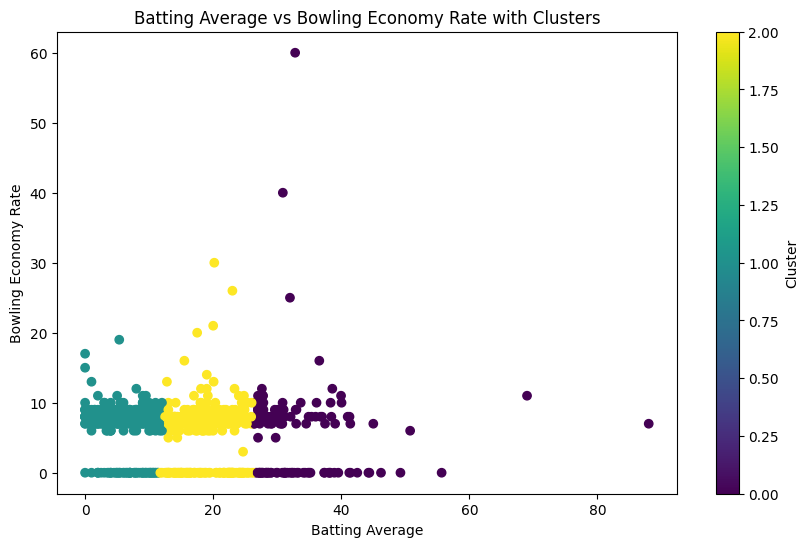

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(player_performance_df['Batting Average'], player_performance_df['Bowling Economy Rate'], c=player_performance_df['Cluster'])
plt.xlabel('Batting Average')
plt.ylabel('Bowling Economy Rate')
plt.title('Batting Average vs Bowling Economy Rate with Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [91]:
# from above plot we can obsreve that the clusters with 0 , 1, 2 have the following meaning
# 0---->Batsman
# 1---->All-Rounder
# 2---->Bowler


cluster_mapping = {0: 'Batsman', 1: 'All-Rounder', 2: 'Bowler'}
player_performance_df['Cluster'] = player_performance_df['Cluster'].replace(cluster_mapping)
player_performance_df.head(2)

,Player,Total Runs,Balls Faced,Matches Played,Wickets Taken,Dismissals,Batting Average,Strike Rate,Man Of Match Count,Total Runs Conceded,Total Balls Bowled,Total Overs Bowled,Bowling Economy Rate,Cluster
0,A Ashish Reddy,280,196,23,19.0,15.0,18.666667,142.857143,0,400.0,270.0,45.0,8,Bowler
1,A Badoni,634,505,35,2.0,26.0,24.384615,125.544554,0,37.0,25.0,4.1,9,Bowler


In [92]:
# a small check
player_performance_df[player_performance_df['Player']=='V Kohli']['Cluster']

631    Batsman
Name: Cluster, dtype: object

## 8.Identify Top 10 Batsmen in each run category

In [93]:
top_6_scorer = deliveries[deliveries['batsman_runs'] == 6].groupby('batter').size().sort_values(ascending=False).head(10)

top_4_scorer = deliveries[deliveries['batsman_runs'] == 4].groupby('batter').size().sort_values(ascending=False).head(10)

top_2_scorer = deliveries[deliveries['batsman_runs'] == 2].groupby('batter').size().sort_values(ascending=False).head(10)

top_1_scorer = deliveries[deliveries['batsman_runs'] == 1].groupby('batter').size().sort_values(ascending=False).head(10)

In [94]:
top_6_scorer

batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
dtype: int64

In [95]:
top_4_scorer

batter
S Dhawan        768
V Kohli         708
DA Warner       663
RG Sharma       599
SK Raina        506
G Gambhir       492
RV Uthappa      481
AM Rahane       479
KD Karthik      466
F du Plessis    422
dtype: int64

In [96]:
top_2_scorer

batter
V Kohli           445
DA Warner         370
MS Dhoni          340
S Dhawan          299
SK Raina          271
AB de Villiers    268
RG Sharma         263
KD Karthik        258
AM Rahane         257
G Gambhir         249
dtype: int64

In [97]:
top_1_scorer

batter
V Kohli       2591
S Dhawan      2102
RG Sharma     1996
SK Raina      1708
DA Warner     1682
MS Dhoni      1554
AM Rahane     1537
AT Rayudu     1495
KL Rahul      1464
KD Karthik    1464
dtype: int64

In [98]:
top_scorers_df = pd.DataFrame({
    '1s': top_1_scorer,
    '2s': top_2_scorer,
    '4s': top_4_scorer,
    '6s': top_6_scorer
})


<Figure size 1400x600 with 0 Axes>

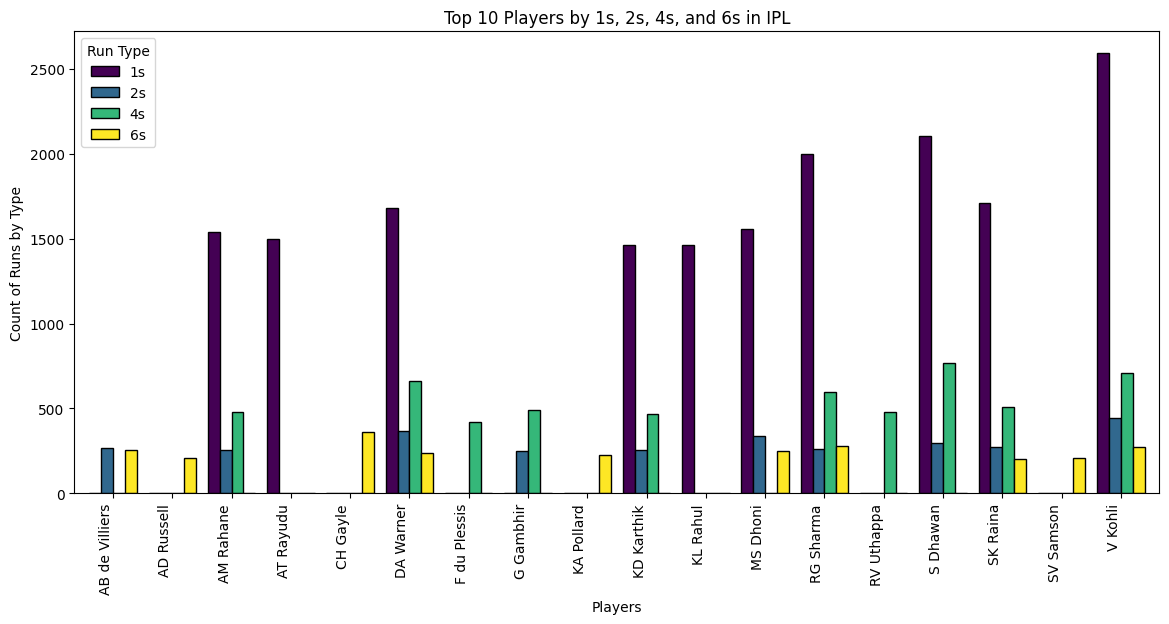

In [99]:
# Plot settings
plt.figure(figsize=(14, 6))
top_scorers_df.plot(kind='bar', width=0.8, figsize=(14, 6), colormap='viridis', edgecolor='black')

# Labels and Title
plt.xlabel("Players")
plt.ylabel("Count of Runs by Type")
plt.title("Top 10 Players by 1s, 2s, 4s, and 6s in IPL")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title="Run Type")

# Show plot
plt.show()

# Seasonal Analysis

In [100]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0


In [101]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1076 entries, 0 to 1089
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1076 non-null   int64         
 1   season           1076 non-null   object        
 2   city             1076 non-null   object        
 3   date             1076 non-null   datetime64[ns]
 4   match_type       1076 non-null   object        
 5   player_of_match  1076 non-null   object        
 6   venue            1076 non-null   object        
 7   team1            1076 non-null   object        
 8   team2            1076 non-null   object        
 9   toss_winner      1076 non-null   object        
 10  toss_decision    1076 non-null   object        
 11  winner           1076 non-null   object        
 12  result           1076 non-null   object        
 13  result_margin    1076 non-null   float64       
 14  target_runs      1076 non-null   float64     

In [102]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   match_id      260920 non-null  int64 
 1   inning        260920 non-null  int64 
 2   batting_team  260920 non-null  object
 3   bowling_team  260920 non-null  object
 4   over          260920 non-null  int64 
 5   ball          260920 non-null  int64 
 6   batter        260920 non-null  object
 7   bowler        260920 non-null  object
 8   non_striker   260920 non-null  object
 9   batsman_runs  260920 non-null  int64 
 10  extra_runs    260920 non-null  int64 
 11  total_runs    260920 non-null  int64 
 12  is_wicket     260920 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 25.9+ MB


In [103]:
deliveries[120:200]

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
120,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,19,3,BB McCullum,P Kumar,Mohammad Hafeez,2,0,2,0
121,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,19,4,BB McCullum,P Kumar,Mohammad Hafeez,0,0,0,0
122,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,19,5,BB McCullum,P Kumar,Mohammad Hafeez,2,0,2,0
123,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,19,6,BB McCullum,P Kumar,Mohammad Hafeez,6,0,6,0
124,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,10,5,P Kumar,AB Agarkar,AA Noffke,4,0,4,0
196,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,10,6,P Kumar,AB Agarkar,AA Noffke,0,0,0,0
197,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,11,1,AA Noffke,SC Ganguly,P Kumar,1,0,1,1
198,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,11,2,Z Khan,SC Ganguly,P Kumar,0,0,0,0


In [104]:
matches['season'] = matches['season'].replace({'2009/10': '2010', '2007/08': '2008', '2020/21': '2020'})
matches['season'].value_counts()

season
2012    74
2022    74
2013    74
2023    73
2011    72
2024    71
2018    60
2016    60
2021    59
2010    59
2014    59
2008    58
2017    58
2019    57
2009    56
2015    56
2020    56
Name: count, dtype: int64

## 1. average runs per match per season

In [105]:
total_runs_per_match = deliveries.groupby('match_id')['total_runs'].sum().reset_index()
total_runs_per_match.rename(columns={'total_runs': 'total_match_runs'}, inplace=True)
total_runs_per_match

,match_id,total_match_runs
0,335982,304
1,335983,447
2,335984,261
3,335985,331
4,335986,222
...,...,...
1090,1426307,429
1091,1426309,323
1092,1426310,346
1093,1426311,314


In [106]:
merged_df = pd.merge(total_runs_per_match, matches[['id', 'season']], left_on='match_id', right_on='id', how='left')
merged_df.drop(columns=['match_id'])

,total_match_runs,id,season
0,304,335982.0,2008
1,447,335983.0,2008
2,261,335984.0,2008
3,331,335985.0,2008
4,222,335986.0,2008
...,...,...,...
1090,429,1426307.0,2024
1091,323,1426309.0,2024
1092,346,1426310.0,2024
1093,314,1426311.0,2024


In [107]:
avg_runs_per_match = merged_df.groupby('season')['total_match_runs'].mean().reset_index()
avg_runs_per_match.rename(columns={'total_match_runs': 'Avg Runs per Match'}, inplace=True)
seasonal_performance_df=avg_runs_per_match
seasonal_performance_df

# NOTE : "Avg Runs per Match" refers to the average total runs scored FOR BOTH THE INNINGS(innings 1 + innings 2) not thw "Avg Runs per INNINGS"

,season,Avg Runs per Match
0,2008,309.258621
1,2009,286.071429
2,2010,315.118644
3,2011,293.027778
4,2012,303.418919
5,2013,296.986486
6,2014,315.338983
7,2015,313.589286
8,2016,314.366667
9,2017,318.327586


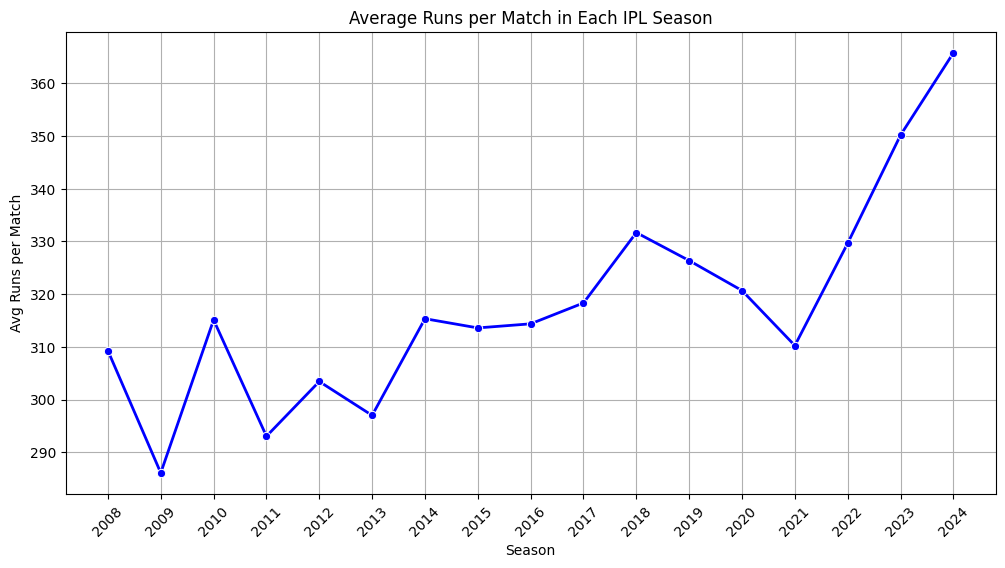

In [108]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_performance_df, x='season', y='Avg Runs per Match', marker='o', color='b', linewidth=2)

plt.xlabel("Season")
plt.ylabel("Avg Runs per Match")
plt.title("Average Runs per Match in Each IPL Season")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)

# Show plot
plt.show()

## 2. targets of 200+ runs per season

In [109]:
k = matches[matches['target_runs']>=200].groupby('season').size().reset_index(name='matches_with_200plus_target')
seasonal_performance_df = pd.merge(seasonal_performance_df, k,on='season', how='left')
seasonal_performance_df

,season,Avg Runs per Match,matches_with_200plus_target
0,2008,309.258621,7
1,2009,286.071429,1
2,2010,315.118644,5
3,2011,293.027778,4
4,2012,303.418919,4
5,2013,296.986486,4
6,2014,315.338983,6
7,2015,313.589286,7
8,2016,314.366667,5
9,2017,318.327586,8


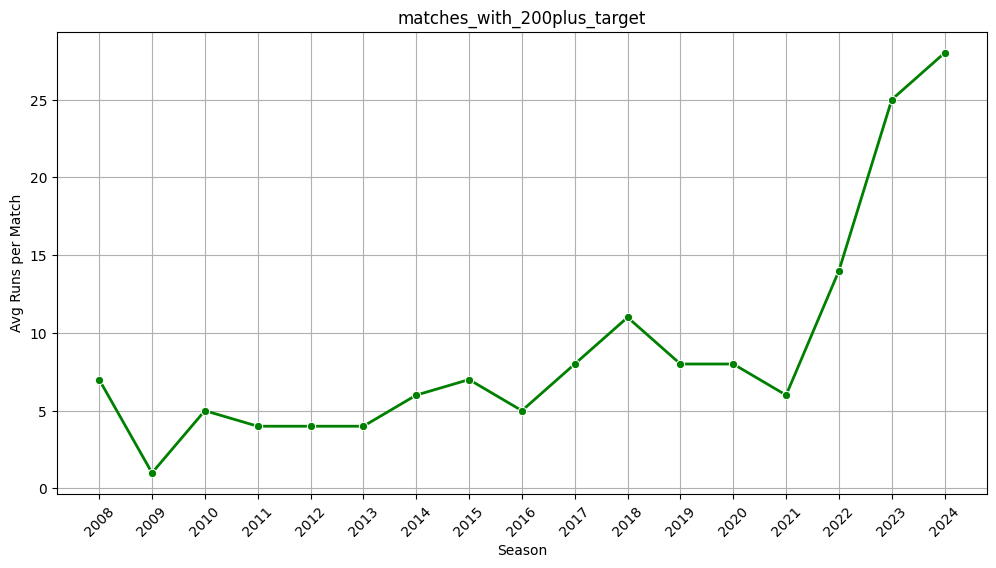

In [111]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_performance_df, x='season', y='matches_with_200plus_target', marker='o', color='g', linewidth=2)
plt.xlabel("Season")
plt.ylabel("Avg Runs per Match")
plt.title("matches_with_200plus_target")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 3. Average score of each team per season

In [111]:
single_team_runs = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
team_runs_season = pd.merge(single_team_runs, matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

team_runs_season.drop(columns=['match_id'],inplace=True)
team_runs_season

,batting_team,total_runs,id,season
0,Kolkata Knight Riders,222,335982.0,2008
1,Royal Challengers Bengaluru,82,335982.0,2008
2,Chennai Super Kings,240,335983.0,2008
3,Punjab Kings,207,335983.0,2008
4,Delhi Capitals,132,335984.0,2008
...,...,...,...,...
2182,Royal Challengers Bengaluru,172,1426310.0,2024
2183,Rajasthan Royals,139,1426311.0,2024
2184,Sunrisers Hyderabad,175,1426311.0,2024
2185,Kolkata Knight Riders,114,1426312.0,2024


In [112]:
avg_score_per_team_season = team_runs_season.groupby(['season', 'batting_team'])['total_runs'].mean().reset_index()
avg_score_per_team_season.rename(columns={'total_runs': 'Avg Score'}, inplace=True)

avg_score_per_team_season

,season,batting_team,Avg Score
0,2008,Chennai Super Kings,157.500000
1,2008,Delhi Capitals,151.285714
2,2008,Kolkata Knight Riders,149.384615
3,2008,Mumbai Indians,148.571429
4,2008,Punjab Kings,164.266667
...,...,...,...
141,2024,Mumbai Indians,183.428571
142,2024,Punjab Kings,177.642857
143,2024,Rajasthan Royals,176.466667
144,2024,Royal Challengers Bengaluru,195.333333


## 4.Analyze runs of Orange Cap Holders per season

In [113]:
player_runs = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
player_runs_and_season = pd.merge(player_runs, matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

player_runs_and_season.drop(columns=['match_id'],inplace=True)
player_runs_in_season = player_runs_and_season.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()

player_runs_in_season


,season,batter,batsman_runs
0,2008,A Chopra,42
1,2008,A Kumble,13
2,2008,A Mishra,37
3,2008,A Mukund,0
4,2008,A Nehra,3
...,...,...,...
2604,2024,WG Jacks,230
2605,2024,WP Saha,136
2606,2024,Washington Sundar,0
2607,2024,YBK Jaiswal,435


In [114]:
orange_cap_per_season = player_runs_in_season.loc[player_runs_in_season.groupby('season')['batsman_runs'].idxmax()]
orange_cap_per_season.rename(columns={'batter': 'Orange Cap Holder', 'batsman_runs': 'Total Runs'}, inplace=True)
orange_cap_per_season.reset_index(drop=True, inplace=True)
orange_cap_per_season

,season,Orange Cap Holder,Total Runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


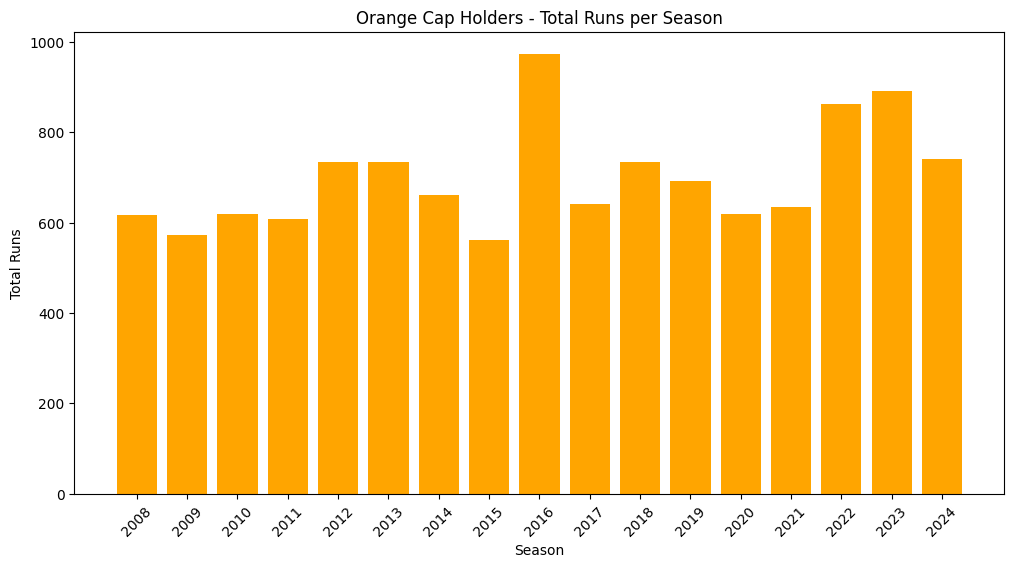

In [115]:
plt.figure(figsize=(12, 6))
plt.bar(orange_cap_per_season['season'], orange_cap_per_season['Total Runs'], color='orange')

plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.title('Orange Cap Holders - Total Runs per Season')
plt.xticks(rotation=45)

plt.show()

## 5.wickets of Purple Cap Holders per season

In [116]:
wicket_deliveries=deliveries[(deliveries['is_wicket'] == 1)]
player_wickets = wicket_deliveries.groupby(['match_id', 'bowler'])['is_wicket'].sum().reset_index()
player_wickets_and_season = pd.merge(player_wickets, matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

player_wickets_and_season.drop(columns=['match_id'],inplace=True)
player_wickets_in_season = player_wickets_and_season.groupby(['season', 'bowler'])['is_wicket'].sum().reset_index()
player_wickets_in_season.rename(columns={'is_wicket':'total_wickets'},inplace=True)
player_wickets_in_season

,season,bowler,total_wickets
0,2008,A Kumble,8
1,2008,A Mishra,11
2,2008,A Nehra,14
3,2008,A Nel,1
4,2008,AA Noffke,1
...,...,...,...
1608,2024,Washington Sundar,1
1609,2024,YS Chahal,19
1610,2024,Yash Dayal,16
1611,2024,Yash Thakur,12


In [117]:
purple_cap_per_season = player_wickets_in_season.loc[player_wickets_in_season.groupby('season')['total_wickets'].idxmax()]
purple_cap_per_season.rename(columns={'bowler': 'Purple Cap Holder', 'total_wickets': 'Total Wickets'}, inplace=True)
purple_cap_per_season.reset_index(drop=True, inplace=True)
purple_cap_per_season

,season,Purple Cap Holder,Total Wickets
0,2008,Sohail Tanvir,24
1,2009,RP Singh,26
2,2010,PP Ojha,22
3,2011,SL Malinga,30
4,2012,M Morkel,30
5,2013,DJ Bravo,34
6,2014,MM Sharma,26
7,2015,DJ Bravo,28
8,2016,B Kumar,24
9,2017,B Kumar,28


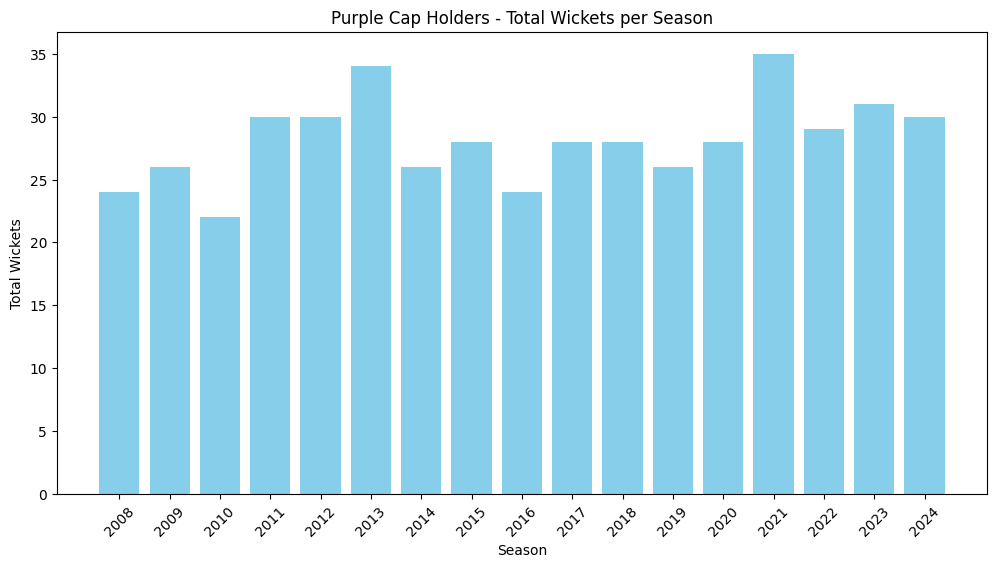

In [118]:
plt.figure(figsize=(12, 6))
plt.bar(purple_cap_per_season['season'], purple_cap_per_season['Total Wickets'], color='skyblue')

plt.xlabel('Season')
plt.ylabel('Total Wickets')
plt.title('Purple Cap Holders - Total Wickets per Season')
plt.xticks(rotation=45)

plt.show()

## 6. Top 10 bowlers per season

In [119]:
bowling_data = pd.merge(deliveries, matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

grouped_data = bowling_data.groupby(['season', 'bowler'])
total_runs_conceded = grouped_data['total_runs'].sum()
total_balls_bowled = grouped_data['bowler'].count()
total_wickets = grouped_data['is_wicket'].sum()

bowler_stats = pd.DataFrame({
    'Total_Runs_Conceded': total_runs_conceded,
    'Total_Balls_Bowled': total_balls_bowled,
    'Total_Wickets': total_wickets
}).reset_index()


bowler_stats['Total_Overs_Bowled'] = bowler_stats['Total_Balls_Bowled'] // 6 + (bowler_stats['Total_Balls_Bowled'] % 6) / 10
bowler_stats['Bowling_Economy_Rate'] = bowler_stats['Total_Runs_Conceded'] / bowler_stats['Total_Overs_Bowled']
bowler_stats['Bowling_Economy_Rate'] = bowler_stats['Bowling_Economy_Rate'].fillna(0)

bowler_stats

,season,bowler,Total_Runs_Conceded,Total_Balls_Bowled,Total_Wickets,Total_Overs_Bowled,Bowling_Economy_Rate
0,2008,A Kumble,314,236,8,39.2,8.010204
1,2008,A Mishra,140,123,11,20.3,6.896552
2,2008,A Nehra,357,280,14,46.4,7.693966
3,2008,A Nel,31,18,1,3.0,10.333333
4,2008,A Symonds,106,44,0,7.2,14.722222
...,...,...,...,...,...,...,...
1930,2024,Washington Sundar,73,30,1,5.0,14.600000
1931,2024,YS Chahal,548,362,19,60.2,9.102990
1932,2024,Yash Dayal,472,322,16,53.4,8.838951
1933,2024,Yash Thakur,405,225,12,37.3,10.857909


In [120]:
top_10_bowlers_per_season_wrt_wickets = bowler_stats.groupby('season').apply(lambda x: x.nlargest(10, 'Total_Wickets')).reset_index(drop=True)
top_10_bowlers_per_season_wrt_economy_rate = bowler_stats.groupby('season').apply(lambda x: x.nsmallest(10, 'Bowling_Economy_Rate')).reset_index(drop=True)

C:\Users\AFZAL\AppData\Local\Temp\ipykernel_9160\3308525311.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_bowlers_per_season_wrt_wickets = bowler_stats.groupby('season').apply(lambda x: x.nlargest(10, 'Total_Wickets')).reset_index(drop=True)
C:\Users\AFZAL\AppData\Local\Temp\ipykernel_9160\3308525311.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_bowlers_per_season_wrt_economy_rate 

In [121]:
top_10_bowlers_per_season_wrt_wickets

,season,bowler,Total_Runs_Conceded,Total_Balls_Bowled,Total_Wickets,Total_Overs_Bowled,Bowling_Economy_Rate
0,2008,Sohail Tanvir,275,265,24,44.1,6.235828
1,2008,IK Pathan,361,336,20,56.0,6.446429
2,2008,JA Morkel,414,310,20,51.4,8.054475
3,2008,SK Warne,409,319,20,53.1,7.702448
4,2008,SR Watson,395,344,20,57.2,6.905594
...,...,...,...,...,...,...,...
165,2024,Arshdeep Singh,514,326,20,54.2,9.483395
166,2024,Harshit Rana,385,264,20,44.0,8.750000
167,2024,MA Starc,450,267,20,44.3,10.158014
168,2024,T Natarajan,469,332,20,55.2,8.496377


In [122]:
top_10_bowlers_per_season_wrt_economy_rate

,season,bowler,Total_Runs_Conceded,Total_Balls_Bowled,Total_Wickets,Total_Overs_Bowled,Bowling_Economy_Rate
0,2008,TM Dilshan,3,6,1,1.0,3.000000
1,2008,DJ Thornely,40,44,3,7.2,5.555556
2,2008,BAW Mendis,24,24,1,4.0,6.000000
3,2008,Sohail Tanvir,275,265,24,44.1,6.235828
4,2008,RG Sharma,26,25,1,4.1,6.341463
...,...,...,...,...,...,...,...
165,2024,N Wadhera,13,12,0,2.0,6.500000
166,2024,SP Narine,376,334,18,55.4,6.787004
167,2024,LS Livingstone,86,75,3,12.3,6.991870
168,2024,DJ Hooda,22,19,0,3.1,7.096774


## Implementation of our model

In [123]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Merge datasets
merged_data = pd.merge(deliveries, matches, left_on='match_id', right_on='id')

# Convert 'season' column to integer
matches['season'] = matches['season'].astype(int)
merged_data['season'] = merged_data['season'].astype(int)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['team1', 'team2', 'venue', 'city', 'toss_winner', 'toss_decision']

for col in categorical_cols:
    le = LabelEncoder()
    merged_data[col] = le.fit_transform(merged_data[col])
    label_encoders[col] = le

# Define features and target
features = ['team1', 'team2', 'venue', 'city', 'toss_winner', 'toss_decision']
X = merged_data[features]
y = merged_data['winner']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Encode target variable
le_winner = LabelEncoder()
y = le_winner.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:

from sklearn.model_selection import RandomizedSearchCV

nn_model = MLPClassifier( random_state=42)

param_grid = {
    'hidden_layer_sizes': [(32,), (64,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001]
}

random_search = RandomizedSearchCV(nn_model, param_grid, n_iter=8, cv=2, random_state=42, verbose=2, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)



Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (64,), 'alpha': 0.001, 'activation': 'relu'}


C:\Users\AFZAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [125]:

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Ensemble Model (Voting Classifier)
ensemble_model = VotingClassifier(estimators=[
    ('nn',random_search),
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')
ensemble_model.fit(X_train, y_train)


Fitting 2 folds for each of 8 candidates, totalling 16 fits


C:\Users\AFZAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('nn',
                              RandomizedSearchCV(cv=2,
                                                 estimator=MLPClassifier(random_state=42),
                                                 n_iter=8, n_jobs=-1,
                                                 param_distributions={'activation': ['relu'],
                                                                      'alpha': [0.0001,
                                                                                0.001],
                                                                      'hidden_layer_sizes': [(32,),
                                                                                             (64,)],
                                                                      'learning_rate': ['constant',
                                                                                        'adaptive'],
                                                                      'solver': ['adam']},
                                                 random_state=42, verbose=2)),
                             ('rf', RandomForestClassifier(random_state=4...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [126]:

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


# Evaluate the optimized model
y_pred_nn = random_search.predict(X_test)
print("Optimized Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Optimized Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn))

# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Evaluate Ensemble Model
y_pred_ensemble = ensemble_model.predict(X_test)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Ensemble Model Classification Report:\n", classification_report(y_test, y_pred_ensemble))

Random Forest Accuracy: 0.8992990654205607
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      6685
           1       0.91      0.81      0.86      5316
           2       0.92      0.94      0.93       642
           3       0.97      0.97      0.97      1372
           4       1.00      1.00      1.00       256
           5       0.90      0.86      0.88      6186
           6       0.96      0.96      0.96      1191
           7       0.88      0.88      0.88      6834
           8       0.88      0.91      0.89       579
           9       0.87      0.93      0.90      5174
          10       0.94      0.89      0.92      5271
          11       0.94      1.00      0.97       667
          12       0.84      0.89      0.87      5544
          13       0.93      0.92      0.92      5643

    accuracy                           0.90     51360
   macro avg       0.92      0.92      0.92     51360

In [128]:
# Convert categorical columns to strings in merged_data
for col in categorical_cols:
    merged_data[col] = merged_data[col].astype(str)

# Convert categorical columns to strings in simulated_matches
for col in categorical_cols:
    simulated_matches[col] = simulated_matches[col].astype(str)

In [129]:
# Create hypothetical 2025 match scenarios
teams = merged_data['team1'].unique()
venues = merged_data['venue'].unique()
toss_decisions = ['bat', 'field']

# Simulate matches
simulated_matches = []
for team1 in teams:
    for team2 in teams:
        if team1 != team2:
            for venue in venues:
                for toss_decision in toss_decisions:
                    simulated_matches.append({
                        'team1': team1,
                        'team2': team2,
                        'venue': venue,
                        'city': venue,  # Assuming city is same as venue
                        'toss_winner': team1,  # Assume team1 wins toss
                        'toss_decision': toss_decision
                    })

# Convert to DataFrame
simulated_matches = pd.DataFrame(simulated_matches)

# Retrain LabelEncoder on combined data
for col in categorical_cols:
    label_encoders[col].fit(np.concatenate([merged_data[col].unique(), simulated_matches[col].unique()]))

# Convert all categorical columns to string 
for col in categorical_cols:
    simulated_matches[col] = simulated_matches[col].astype(str)

# Apply label encoding to simulated matches
for col in categorical_cols:
    simulated_matches[col] = label_encoders[col].transform(simulated_matches[col])

# Ensure feature names match
simulated_matches = simulated_matches[features]

# Convert to numeric for model compatibility
simulated_matches = simulated_matches.apply(pd.to_numeric)

# Predict winners
simulated_matches['predicted_winner'] = ensemble_model.predict(simulated_matches)

# Decode predicted winners
simulated_matches['predicted_winner'] = le_winner.inverse_transform(simulated_matches['predicted_winner'])

# Determine the most likely winner
predicted_winner = simulated_matches['predicted_winner'].mode()[0]
print("Predicted Winner of 2025 IPL Season:", predicted_winner)


C:\Users\AFZAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\AFZAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Predicted Winner of 2025 IPL Season: Kolkata Knight Riders


# Exporting to PKL file

In [130]:
import pickle

with open('ipl_model.pkl', 'wb') as file:
    pickle.dump(ensemble_model, file)

print("Ensemble model exported to 'ensemble_model.pkl'")


Ensemble model exported to 'ensemble_model.pkl'
